# Feature Selection
This notebook focuses on selecting the most relevant features using techniques like Feature Importance, Recursive Feature Elimination (RFE) and the Chi-Square Test.

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

## 2. Loading the cleaned dataset

In [2]:
df = pd.read_csv("../data/cleaned_heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

## 3. Applying Feature Importance using Random Forest

In [3]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

## 4. Visualizing Feature Importance

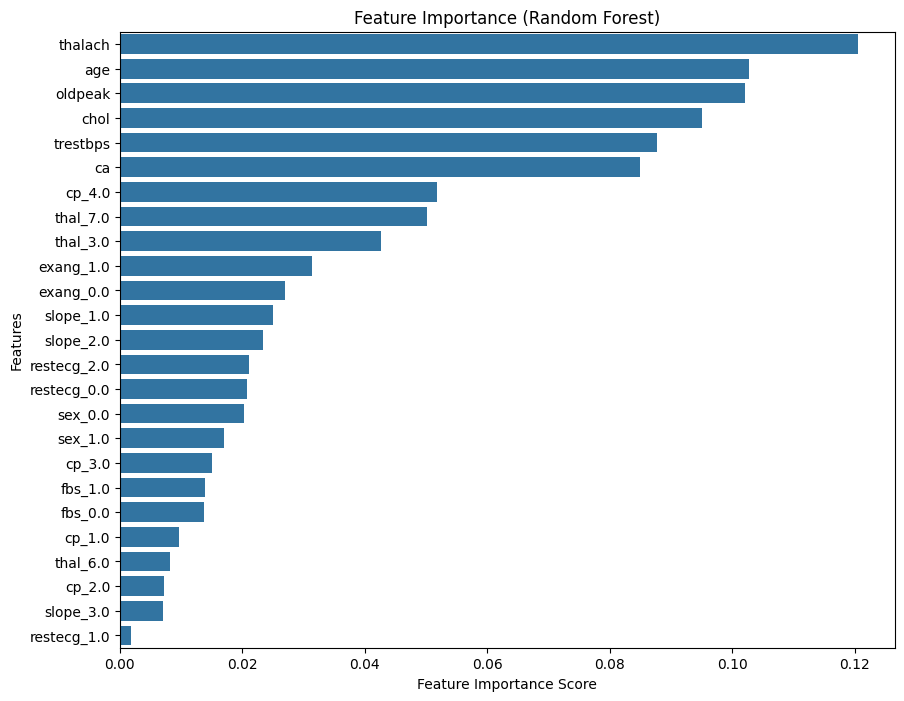

In [4]:
plt.figure(figsize=(10,8))
sns.barplot(x=importances, y=importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

## 5. Recursive Feature Elimination

In [5]:
lr = LogisticRegression(random_state=42)
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X, y)

print("RFE Selected Features:", list(X.columns[rfe.support_]))

RFE Selected Features: ['ca', 'cp_4.0', 'fbs_1.0', 'restecg_0.0', 'exang_1.0', 'slope_1.0', 'thal_3.0', 'thal_7.0']


## 6. Chi-Square Test

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi = SelectKBest(score_func=chi2, k=8)
chi.fit(X_scaled, y)

print("Chi-Square Selected Features:", list(X.columns[chi.get_support()]))

Chi-Square Selected Features: ['ca', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_1.0', 'slope_2.0', 'thal_3.0', 'thal_7.0']


## 7. Saving the reduced dataset

In [7]:
selected_features = importances.head(8).index.tolist()
df_selected = df[selected_features + ["target"]]
df_selected.to_csv("../data/selected_feature_heart_disease.csv", index=False)